# Assignment: Predicting Molecular Mutagenicity Using KNN for SPR Modeling

# Importing LIbraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.feature_selection import mutual_info_classif

# Loading The DataSet

In [31]:
# Load dataset
file_path = "mutagenicity_kNN.csv"
df = pd.read_csv(file_path)

print(df.head())

   Unnamed: 0  Id       CAS                     SMILES    Status  \
0           0   1  100-00-5   O=[N+]([O-])c1ccc(cc1)Cl  Training   
1           1   2  100-01-6    O=[N+]([O-])c1ccc(N)cc1  Training   
2           2   3  100-02-7    O=[N+]([O-])c1ccc(O)cc1  Training   
3           3   4  100-11-8  O=[N+]([O-])c1ccc(cc1)CBr  Training   
4           4   5  100-12-9   O=[N+]([O-])c1ccc(cc1)CC  Training   

   Experimental value Predicted value  NumValenceElectrons       qed   TPSA  \
0                   1               1                   52  0.463602  43.14   
1                   1               1                   52  0.359544  69.16   
2                   0               1                   52  0.470728  63.37   
3                   1               0                   58  0.432586  43.14   
4                   0               0                   58  0.479785  43.14   

     MolMR  BalabanJ     BertzCT    MolWt  MolLogP  
0  38.1064  3.003401  244.429658  157.556   2.2482  
1  37.5088

# Checking missing values

In [33]:
print("Missing values in each column:\n",df.isnull().sum()) ; 

Missing values in each column:
 Unnamed: 0             0
Id                     0
CAS                    0
SMILES                 0
Status                 0
Experimental value     0
Predicted value        0
NumValenceElectrons    0
qed                    0
TPSA                   0
MolMR                  0
BalabanJ               0
BertzCT                0
MolWt                  0
MolLogP                0
dtype: int64


# Splitting The Dataset

In [34]:
X = df[['NumValenceElectrons', 'qed', 'TPSA', 'MolMR', 'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP']]
y = df['Experimental value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

In [35]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter Tuning Using GridSearchCV

In [36]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': range(1, 20)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

Best k value: 15


# Integrating KNN Model

In [37]:
# Train the model with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Evaluation of Model

In [41]:
# Evaluate the model
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

F1 Score: 0.7437641723356009
Accuracy: 0.7059843885516045
Precision: 0.7310549777117384
Recall: 0.7569230769230769


# Plotting Performance Matrix

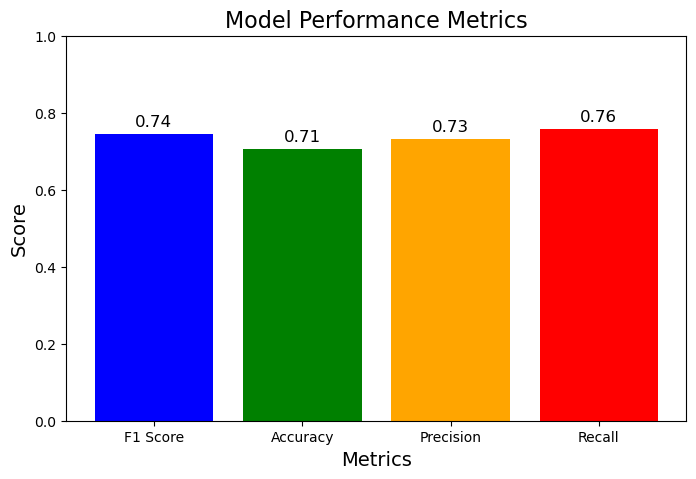

In [42]:
# Plot performance metrics

metrics = ['F1 Score', 'Accuracy', 'Precision', 'Recall']
values = [f1, accuracy, precision, recall]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# Plotting Confusion Matrix

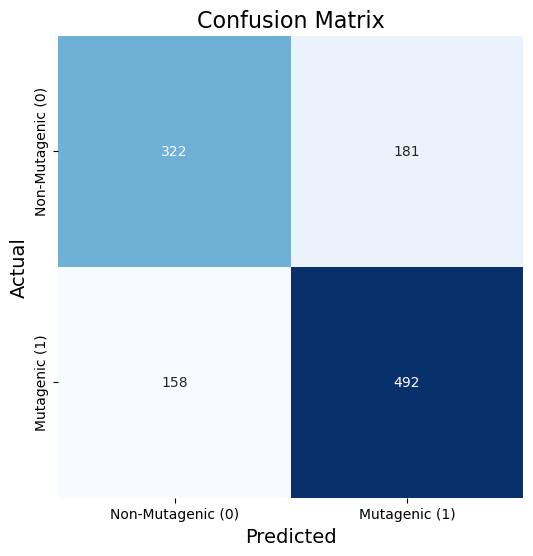

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       503
           1       0.73      0.76      0.74       650

    accuracy                           0.71      1153
   macro avg       0.70      0.70      0.70      1153
weighted avg       0.70      0.71      0.71      1153



In [44]:
# Plot Confustion metrics
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Mutagenic (0)', 'Mutagenic (1)'],
            yticklabels=['Non-Mutagenic (0)', 'Mutagenic (1)'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

print(classification_report(y_test, y_pred))